0. 학습 환결 설정하기
1. 데이터셋 불러오기
2. 차원 축소
3. 샘플 재구축하기
4. 분류 모델 구현하기
* 출제자: 최민정 강사 (패스트캠퍼스)

## 0. 학습 환경 설정하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 1. 데이터셋 불러오기
* https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
filepath = 'https://github.com/mchoimis/financialml/raw/main/fraud/'

In [ ]:
# 파일 불러오기
df = pd.read_csv(filepath + 'fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# 로드한 데이터의 맨 윗 30개 행 확인하기
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# Missing 여부 확인하기
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# 불러온 데이터의 클래스 분포 확인하기
df.groupby(by=['Class']).count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492


In [ ]:
print('Target class is ', '{0:0.4f}'. format(492/(284315+492)*100), '%')

Target class is  0.1727 %


In [ ]:
# 데이터 스케일 조정하기
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler() ## 

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# 원 데이터에서 Time 컬럼과 Amount 컬럼 제외하기
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
# 스케일 조정된 컬럼 추가하기
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

## 스케일 조정된 데이터 확인하기

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
# X와 y 데이터 셋 만들기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

# 데이터 나누기
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# 클래스의 skew 정도가 매우 높기 때문에 클래스간 분포를 맞추는 것이 필요합니다.
# subsample 구축 전 셔플링을 통해 레이블이 한쪽에 몰려있지 않도록 하겠습니다.

df = df.sample(frac=1)

# 데이터 준비
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# 데이터 셔플하기
new_df = normal_distributed_df.sample(frac=1, random_state=0)

# 셔플한 새로운 데이터 셋 확인
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
17480,1.089779,-0.657162,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,3.829427,-5.314332,1.446930,-4.579264,-0.142299,-4.997848,-10.961410,-4.641482,0.567056,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1
241221,-0.237546,0.778205,2.319930,-1.155667,-0.835025,-1.474427,-1.234038,-1.077558,-0.887433,-0.401682,-1.469756,1.541304,-0.725954,0.049463,1.943615,-0.698104,-0.396321,-0.709954,0.441171,-0.352626,-0.143989,-0.369093,-0.156331,0.180869,0.221050,0.071591,-0.113146,-0.167575,0.020996,-0.049624,0
243699,-0.293440,0.791175,-4.320609,3.199939,-5.799736,6.502330,0.378479,-1.948246,-2.167860,-0.728207,-1.977238,-3.473411,4.569194,-9.321153,-1.592518,-14.266836,0.467777,-4.066209,-6.626968,-1.437158,-0.215410,-0.263686,0.476660,0.434278,-0.136940,-0.620072,0.642531,0.280717,-2.649107,0.533641,1
3621,1.355411,-0.958611,-0.249964,-0.371521,1.410132,-1.126919,-1.219167,0.878293,-0.493258,0.146646,-0.784497,0.740513,0.297642,-0.476349,0.878356,-0.731042,0.815983,1.943136,-0.565120,0.430806,1.565583,0.147753,0.499965,1.472650,-0.040344,-0.785061,-0.361566,-0.005049,-0.075794,0.026576,0
258822,-0.296793,0.871075,2.132876,0.179714,-2.098988,0.261297,0.843171,-0.990402,0.728640,-0.505887,-0.041546,0.117904,-0.690792,0.891287,1.218374,0.307328,-0.384803,-0.708462,-0.176523,-0.954883,0.105752,-0.135684,0.104965,0.550505,-0.018758,0.722297,0.443578,0.685887,-0.106115,-0.077195,0


## 2. 차원 축소

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# 차원 축소할 데이터 준비
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# t-SNE  
X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(X.values)
print('t-SNE done')

# PCA 
X_reduced_pca = PCA(n_components=2, random_state=0).fit_transform(X.values)
print('PCA done')

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=0).fit_transform(X.values)
print('Truncated SVD done')

t-SNE done
PCA done
Truncated SVD done


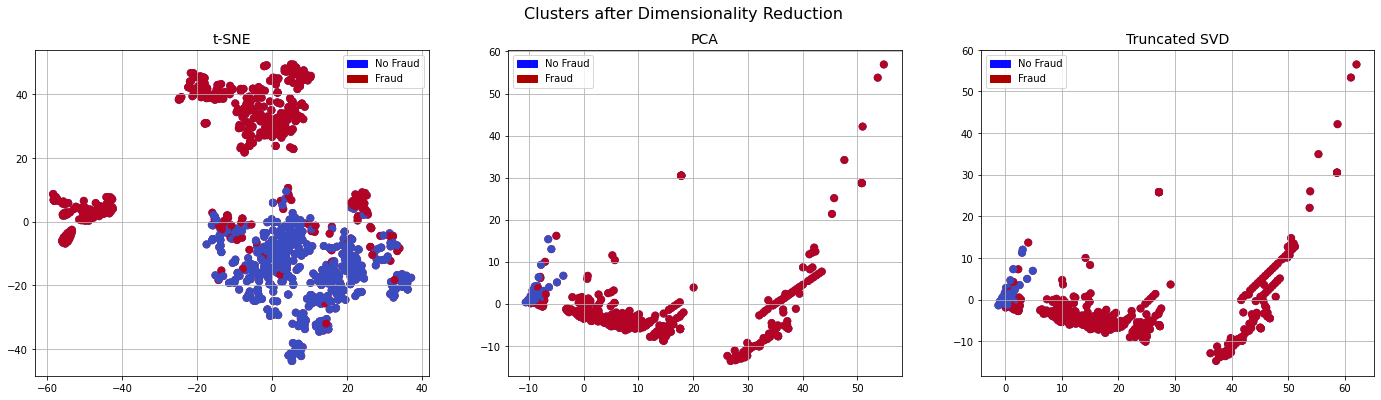

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters after Dimensionality Reduction', fontsize=16)

labels = ['No Fraud', 'Fraud']
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## 3. 샘플 재구축하기

In [ ]:
# 재구축한 데이터의 클래스 분포 확인하기

new_df.groupby(by=['Class']).count()

In [ ]:
# X와 y 데이터 셋 만들기
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# 언더샘플링을 위한 샘플 데이터 구축
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 모델 인풋에 들어가기 위한 데이터의 형태 바꾸기
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# 학습시킬 모델 로드하기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "K Nearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "LightGBM Classifier": LGBMClassifier()
}

In [ ]:
# 모델별 cross validation 한 결과의 평균 정확도 점수 출력하기
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, ':', round(training_score.mean(), 2) * 100, '% accuracy')

LogisticRegression : 94.0 % accuracy
KNeighborsClassifier : 94.0 % accuracy
SVC : 94.0 % accuracy
DecisionTreeClassifier : 90.0 % accuracy
RandomForestClassifier : 94.0 % accuracy
GradientBoostingClassifier : 95.0 % accuracy
LGBMClassifier : 94.0 % accuracy


## 4. 분류 모델 적용하기

In [ ]:
### 잘못된 예

In [ ]:
# 모델별 분류결과 확인하기
from sklearn.metrics import classification_report

for key, classifier in classifiers.items():
    y_pred = classifier.predict(X_test) ####
    results_wrong = classification_report(y_test, y_pred) ####
    print(classifier.__class__.__name__, '-------','\n', results_wrong)

LogisticRegression ------- 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       101
           1       0.95      0.88      0.91        96

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

KNeighborsClassifier ------- 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       101
           1       0.98      0.84      0.91        96

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

SVC ------- 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       101
           1       0.98      0.86      0.92        96

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197


In [ ]:
from sklearn.metrics import confusion_matrix

for key, classifier in classifiers.items():
    y_pred = classifier.predict(X_test) ####
    cm_wrong = confusion_matrix(y_test, y_pred) ####
    print(classifier.__class__.__name__, '\n', cm_wrong, '\n')

LogisticRegression 
 [[97  4]
 [12 84]] 

KNeighborsClassifier 
 [[99  2]
 [15 81]] 

SVC 
 [[99  2]
 [13 83]] 

DecisionTreeClassifier 
 [[95  6]
 [ 9 87]] 

RandomForestClassifier 
 [[100   1]
 [ 11  85]] 

GradientBoostingClassifier 
 [[97  4]
 [10 86]] 

LGBMClassifier 
 [[97  4]
 [10 86]] 



In [ ]:
### 올바른 예

In [ ]:
# 모델별 분류결과 확인하기 (올바른 예)
from sklearn.metrics import classification_report

for key, classifier in classifiers.items():
    y_pred = classifier.predict(original_Xtest)  ####
    results = classification_report(original_ytest, y_pred)  ####
    print(classifier.__class__.__name__, '-------','\n', results)

LogisticRegression ------- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.89      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.93      0.54     56961
weighted avg       1.00      0.97      0.98     56961

KNeighborsClassifier ------- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.87      0.13        98

    accuracy                           0.98     56961
   macro avg       0.53      0.92      0.56     56961
weighted avg       1.00      0.98      0.99     56961

SVC ------- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.11      0.86      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961


In [ ]:
# 모델별 Confusion Matrix 확인하기 (올바른 예)
from sklearn.metrics import confusion_matrix

for key, classifier in classifiers.items():
    y_pred = classifier.predict(original_Xtest) ####
    cm = confusion_matrix(original_ytest, y_pred)  ####
    print(classifier.__class__.__name__, '\n', cm, '\n')

LogisticRegression 
 [[55068  1795]
 [   11    87]] 

KNeighborsClassifier 
 [[55717  1146]
 [   13    85]] 

SVC 
 [[56153   710]
 [   14    84]] 

DecisionTreeClassifier 
 [[52477  4386]
 [    4    94]] 

RandomForestClassifier 
 [[55654  1209]
 [    3    95]] 

GradientBoostingClassifier 
 [[55061  1802]
 [    3    95]] 

LGBMClassifier 
 [[55285  1578]
 [    3    95]] 



In [ ]:
227452+394

227846

In [ ]:
# 방법 1

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
# f1_score, roc_auc_score, precision_score

In [ ]:
# Logistic Regression 모델의 weight 파라미터를 지정하는 방법
w = {1:0, 1:99} ## 불균형 클래스 weight 파라미터 지정

# 모델 피팅
logreg_weighted = LogisticRegression(random_state=0, class_weight=w) ###
logreg_weighted.fit(original_Xtrain,original_ytrain) ###

# 예측값 구하기
y_pred = logreg_weighted.predict(original_Xtest) ###

# 예측결과 확인하기
print('Logistic Regression ------ Weighted')
print(f'Accuracy: {accuracy_score(original_ytest,y_pred)}') ###

print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(original_ytest, y_pred)}')###

print('\n')
print(f'Recall: {recall_score(original_ytest,y_pred)}') ###


Logistic Regression -- Weighted
Accuracy: 0.9980337423851408
Confusion Matrix: 
[[56768    95]
 [   17    81]]
Recall: 0.826530612244898


In [ ]:
# imblearn 패키지를 이용하여 예측 결과 확인하기
from imblearn.metrics import classification_report_imbalanced

label = ['non-fraud', 'fraud'] 
print(classification_report_imbalanced(original_ytest, y_pred, target_names=label))

                   pre       rec       spe        f1       geo       iba       sup

  non-fraud       1.00      1.00      0.83      1.00      0.91      0.84     56863
      fraud       0.46      0.83      1.00      0.59      0.91      0.81        98

avg / total       1.00      1.00      0.83      1.00      0.91      0.84     56961



In [ ]:
# 방법 2

In [ ]:
# 재구축한 샘플 데이터로 모델 피팅하기
logreg_resampled = LogisticRegression(random_state=0) ###
logreg_resampled.fit(X_resampled, y_resampled) ###

# 예측값 구하기
y_pred = logreg_resampled.predict(original_Xtest)

print('Logistic Regression ------ Resampled Data')
print(f'Accuracy: {accuracy_score(original_ytest,y_pred)}') ###
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(original_ytest, y_pred)}') ###
print('\n')
print(f'Recall: {recall_score(original_ytest,y_pred)}') ###

Logistic Regression -- Resampled Data
Accuracy: 0.9886237952283141
Confusion Matrix: 
[[56228   635]
 [   13    85]]
Recall: 0.8673469387755102


In [ ]:
from imblearn.metrics import classification_report_imbalanced

label = ['non-fraud', 'fraud'] 
print(classification_report_imbalanced(original_ytest, y_pred, target_names=label))

                   pre       rec       spe        f1       geo       iba       sup

  non-fraud       1.00      0.99      0.87      0.99      0.93      0.87     56863
      fraud       0.12      0.87      0.99      0.21      0.93      0.85        98

avg / total       1.00      0.99      0.87      0.99      0.93      0.87     56961

